# CASTEP

Results from performance tests of the material property code [CASTEP](http://www.castep.org/) using CASTEP-provided benchmarks:
- Small benchmark: [TiN](http://www.castep.org/CASTEP/TiN)
  > a 32-atom TiN surface, with an adsorbed H atom and a vacuum gap. There are 8 k-points, so it should scale well to 8 cores; beyond that, it relies on CASTEP's other parallelisation strategies.
- Medium benchmark: [Al3x3](http://www.castep.org/CASTEP/Al3x3)
  > a 270-atom sapphire surface, with a vacuum gap. There are only 2 k-points, so it is a good test of the performance of CASTEP's other parallelisation strategies.
- Large benchmark: [DNA](/home/hpcbras1/hpc-tests/apps/castep/README.md)
  > a 1356-atom simulation of a DNA strand (poly-A) with counter-ions, in a large simulation box. There is only 1 k-point (the gamma-point), so, like the Crambin test, its parallel performance is reliant on CASTEP's other parallelisation strategies.

(descriptions from the CASTEP [benchmarks page](http://www.castep.org/CASTEP/Benchmarks))

In [9]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

Each benchmark is run on a range of number of nodes, from 1 up to all available. Each run uses as many mpi tasks (processes) per node as there are physical cores.

The plots show results for the most-recent run on each system/partition/environment combination, against the number of nodes used for each run. Parameters are:
- 'total_time' (s): Total time required for the simulation, as reported by CASTEP
- 'parallel_efficiency' (%): Parallel efficiency, as reported by CASTEP
- 'runtime_real' (s): Wallclock time reported by `time` for entire MPI program start to finish (i.e. may include additional setup/teardown time not captured in 'total_time').


Castep_TiN: total_time


case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx,csd3:cclake-[roce/ib]-icc19-impi19-ucx
num_nodes,,,
1,509.36,505.43,0.99


Castep_TiN: runtime_real


case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx,csd3:cclake-[roce/ib]-icc19-impi19-ucx
num_nodes,,,
1,511.597,506.994,0.99


Castep_TiN: parallel_efficiency


case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx,csd3:cclake-[roce/ib]-icc19-impi19-ucx
num_nodes,,,
1,97.0,98.0,1.01


Castep_Al3x3_*: total_time


case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx,csd3:cclake-[roce/ib]-icc19-impi19-ucx
num_nodes,,,
1,544.29,548.64,1.01
2,288.23,288.51,1.00
4,213.15,265.53,1.25
8,196.96,280.38,1.42
16,211.49,350.56,1.66
32,243.10,450.29,1.85
56,282.15,6471.26,22.94


Castep_Al3x3_*: runtime_real


case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx,csd3:cclake-[roce/ib]-icc19-impi19-ucx
num_nodes,,,
1,552.739,553.786,1.00
2,297.002,295.323,0.99
4,224.267,276.064,1.23
8,202.550,284.868,1.41
16,217.242,355.015,1.63
32,248.174,456.840,1.84
56,287.463,6642.838,23.11


Castep_Al3x3_*: parallel_efficiency


case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx,csd3:cclake-[roce/ib]-icc19-impi19-ucx
num_nodes,,,
1,69.0,69.0,1.00
2,68.0,68.0,1.00
4,50.0,41.0,0.82
8,36.0,23.0,0.64
16,25.0,14.0,0.56
32,13.0,8.0,0.62
56,11.0,0.0,0.00


Castep_DNA_*: total_time - No results found
Castep_DNA_*: runtime_real - No results found
Castep_DNA_*: parallel_efficiency - No results found


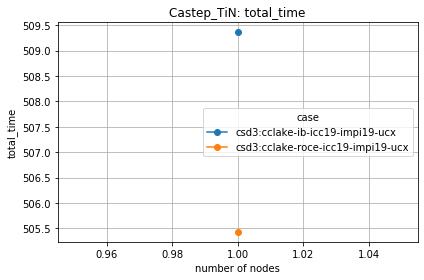

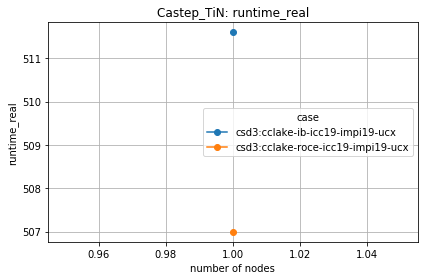

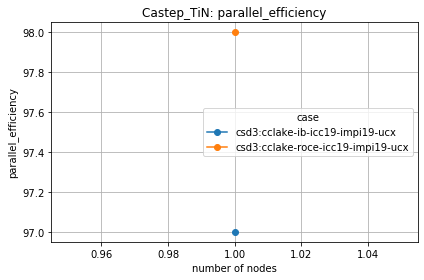

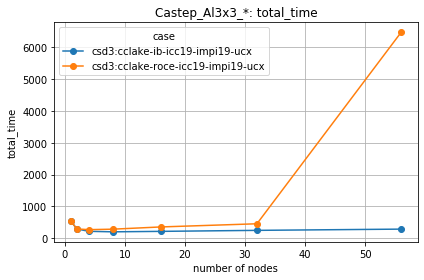

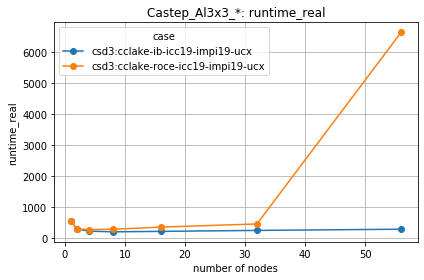

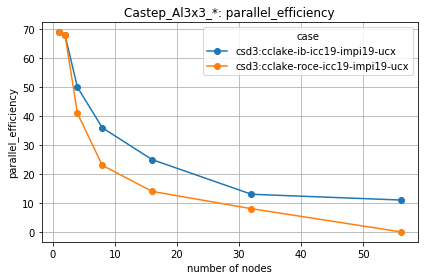

In [10]:
for test in ['Castep_TiN', 'Castep_Al3x3_*', 'Castep_DNA_*']:
    for perf_var in ['total_time', 'runtime_real', 'parallel_efficiency']:
        df = modules.utils.tabulate_last_perf(test, 'num_nodes', perf_var)
        if df is None:
            print('%s: %s - No results found' % (test, perf_var))
            continue
        print('%s: %s' % (test, perf_var))
        ax = df.plot(grid=True, style='o-')
        ax.set_xlabel('number of nodes')
        ax.set_ylabel(perf_var)
        ax.set_title('%s: %s' % (test, perf_var))
        plt.tight_layout()
        
        modules.plots.add_roce_ib_factor(df)
        display(df)
        

# Al3x3 - csd3:cclake plots
The plots below are provided for reporting of the `csd3:cclake` Al3x3 results

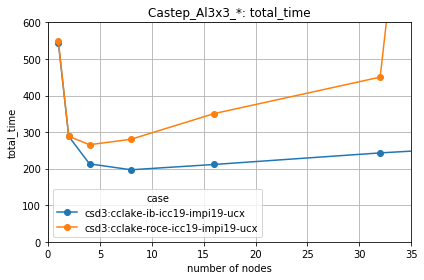

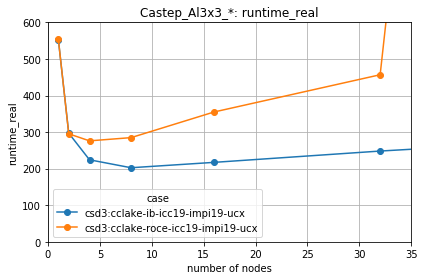

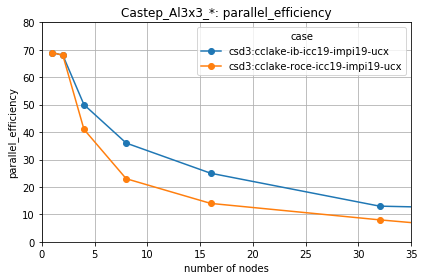

In [11]:
for test in ['Castep_Al3x3_*']:
    for perf_var in ['total_time', 'runtime_real', 'parallel_efficiency']:
        ylims = {
            'total_time': (0, 600),
            'runtime_real': (0, 600),
            'parallel_efficiency': (0, 80),
        }
        df = modules.utils.tabulate_last_perf(test, 'num_nodes', perf_var)
        if df is None:
            print('%s: %s - No results found' % (test, perf_var))
            continue
        ax = df.plot(grid=True, style='o-')
        ax.set_xlabel('number of nodes')
        ax.set_xlim(0, 35)
        ax.set_ylim(*ylims[perf_var])
        ax.set_ylabel(perf_var)
        ax.set_title('%s: %s' % (test, perf_var))
        plt.tight_layout()